Zad. 2

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście Kołmogorowa i teście 𝜒
2 w przypadku weryfikacji zgodności z rozkładem 𝜒
2 o
różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝜒
2 o 𝑘 stopniach swobody i
weryfikować hipotezę, że dane mają rozkład 𝜒
2 o 𝑘 st. swobody. Należy porównać wyniki
klasycznego sposobu testowania i testowania z wykorzystaniem PIT (probability integral transform).
Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących moce testów z
uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


Poniżej generuję różne stopnie swobody (dg - degree of freedom). 

In [2]:
df = [1, 10, 20, 30]  + [i for i in range(35, 101, 5)]
print(df)

[1, 10, 20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


Następnie generuję różne wielkości próbek (różne ilości danych)

In [3]:
SampleSize = [i for i in range(10, 101, 10)]
print(SampleSize)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


Dodaję potrzebne zmienne w celu stworzenia algorytmu, który będzie w stanie zbadać naszą hipotezę

In [4]:
# wyniki będę zapisywał w tablicy: [ [],[],[] ] czyli będzie się tutaj zapisywał wynik trzech testów.
results = []
counter = 0
test_range = 200
#dodałem sobie ile ukonczylem testow zebym widzial ile zostalo do konca symulacji mniej wiecej
total_tests = len(SampleSize) * len(df) * test_range
current_tests  = 0


Poniżej mamy potrójne pętle. Kroki zakomentowano w kodzie, najpierw stworzyłem potrzebne liczniki by zbadać odestki, później zostały wygenerowane dane z rozkładu chi2 w pętli, która idzie po kolei po ilości stopni swobody i wielkości próbek. Również zamieniam dane metodą PIT.
Następnie przeprowadzamy testy, dla PIT obliczamy częstości przekształconych danych, a w dalszej kolejności normalizujemy. Na samym końcu sprawdzamy ile razy została odrzucona hipoteza H0 (p_value wynosi ponizej  0,05)

In [5]:
for size in SampleSize:
    num_bins = int(np.sqrt(size))
    for df_x in df:

        # print(f"Postęp symulacji: {current_tests/total_tests*test_range:.2f}%")

        kologomorov_counter = 0
        kologomorov_pit_counter = 0
        chi2_counter = 0
        chi2_pit_counter = 0


        for i in range(test_range):
 
            # generowanie danych z rozkladu chi2
            data = np.random.chisquare(df_x, size)
            # zamieniam metodą PIT dane
            data_pit = stats.chi2.cdf(data, df=df_x)
            current_tests += 1

             # Przeprowadzasz test Kołmogorowa
            d, p_ks = stats.kstest(data, 'chi2', args=(df_x,))

            d_pit, p_ks_pit = stats.kstest(data_pit, 'uniform')

            # Przeprowadzasz test chi-kwadrat
            chi2, p_chi2 = stats.chisquare(data)

         
           # Obliczanie częstości dla przekształconych danych
            bins = np.linspace(0, 1, num=num_bins+1)
            counts, _ = np.histogram(data_pit, bins=bins)
            expected_counts = np.full_like(counts, fill_value=len(data_pit)/num_bins)

            # Normalizacja oczekiwanych częstości
            expected_counts = expected_counts / np.sum(expected_counts) * np.sum(counts)

            # Przeprowadzenie testu chi-kwadrat dla przekształconych danych
            chi2_pit, p_chi2_pit = stats.chisquare(counts, expected_counts)

            # print("kologomorow: ", p_ks, " chi2: ", p_chi2)

            if(p_ks <= 0.05):
                kologomorov_counter+=1
            if(p_chi2 <= 0.05):
                chi2_counter+=1
            if(p_ks_pit <= 0.05):
                kologomorov_pit_counter+=1
            if(p_chi2_pit <= 0.05):
                chi2_pit_counter+=1

        results.append([kologomorov_counter/test_range, kologomorov_pit_counter/test_range, chi2_counter/test_range, chi2_pit_counter/test_range])    
            


print(results)

[[0.035, 0.035, 0.285, 0.065], [0.055, 0.055, 0.505, 0.075], [0.045, 0.045, 0.54, 0.055], [0.05, 0.05, 0.46, 0.07], [0.075, 0.075, 0.49, 0.075], [0.03, 0.03, 0.435, 0.06], [0.025, 0.025, 0.475, 0.04], [0.04, 0.04, 0.565, 0.045], [0.06, 0.06, 0.49, 0.06], [0.065, 0.065, 0.43, 0.065], [0.045, 0.045, 0.475, 0.06], [0.045, 0.045, 0.47, 0.05], [0.045, 0.045, 0.47, 0.055], [0.07, 0.07, 0.465, 0.08], [0.04, 0.04, 0.48, 0.055], [0.04, 0.04, 0.455, 0.04], [0.05, 0.05, 0.495, 0.07], [0.065, 0.065, 0.51, 0.065], [0.065, 0.065, 0.485, 0.04], [0.09, 0.09, 0.675, 0.045], [0.07, 0.07, 0.705, 0.055], [0.035, 0.035, 0.625, 0.02], [0.02, 0.02, 0.68, 0.055], [0.08, 0.08, 0.75, 0.075], [0.045, 0.045, 0.655, 0.045], [0.06, 0.06, 0.75, 0.03], [0.025, 0.025, 0.75, 0.025], [0.06, 0.06, 0.705, 0.04], [0.045, 0.045, 0.71, 0.035], [0.055, 0.055, 0.685, 0.05], [0.045, 0.045, 0.655, 0.035], [0.02, 0.02, 0.7, 0.03], [0.06, 0.06, 0.76, 0.045], [0.055, 0.055, 0.715, 0.06], [0.05, 0.05, 0.69, 0.04], [0.035, 0.035, 0.7

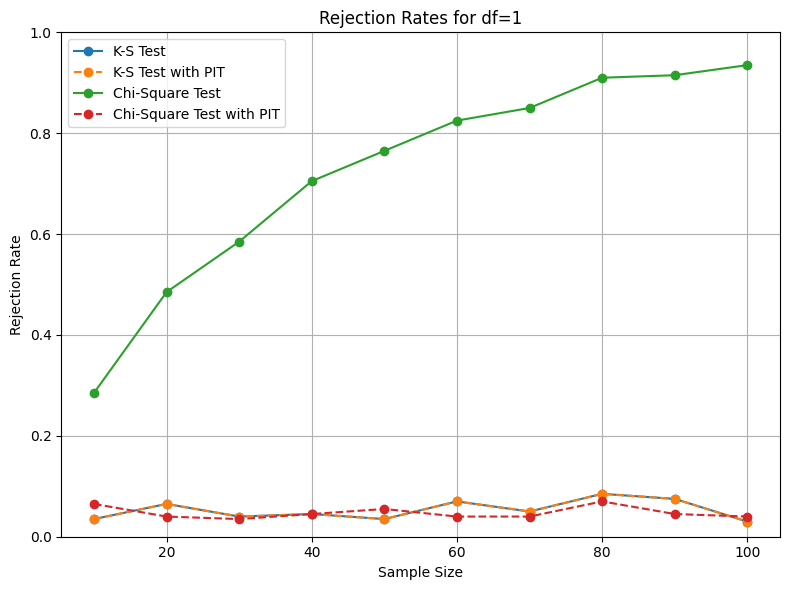

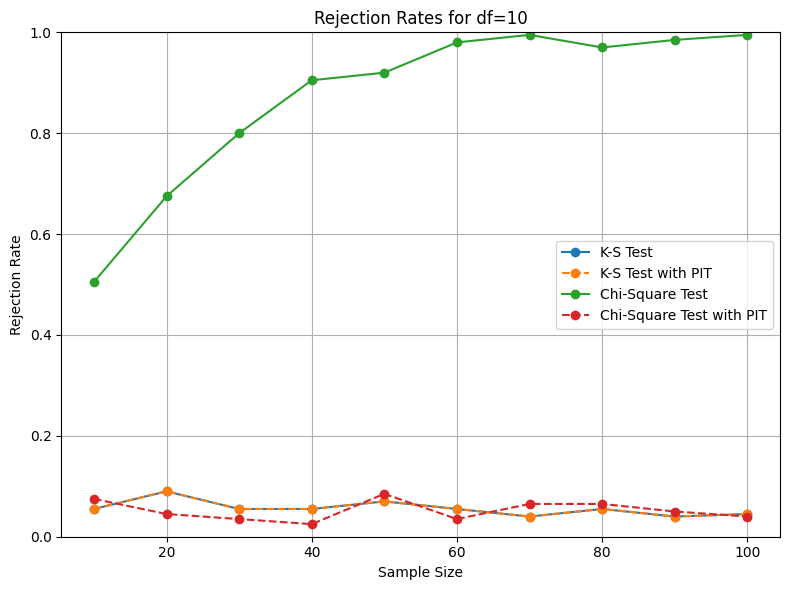

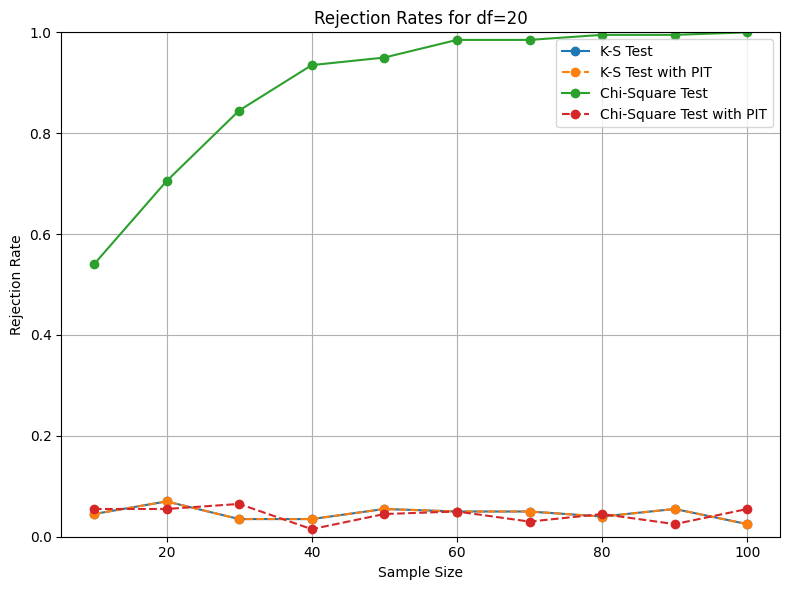

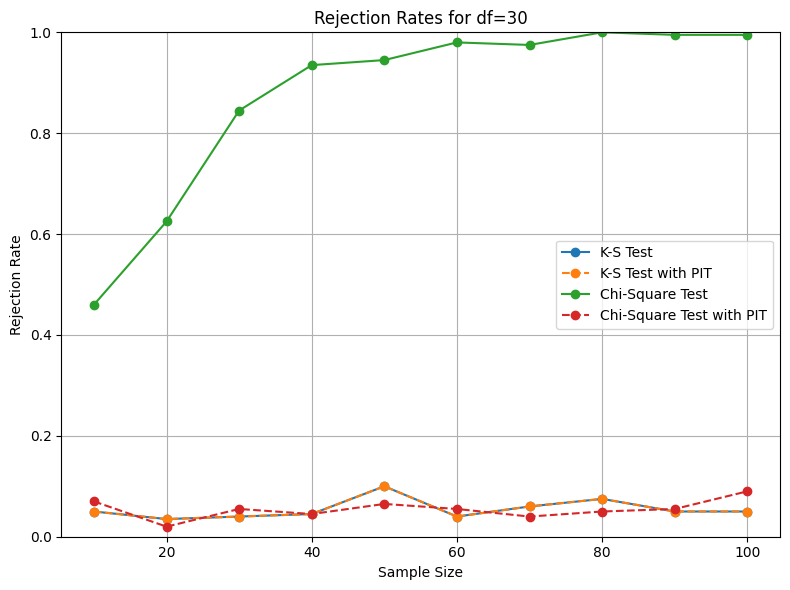

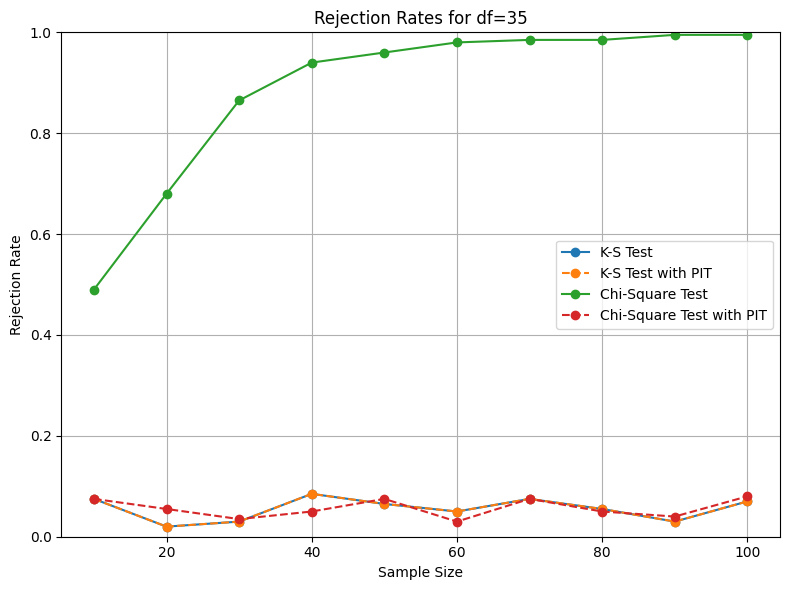

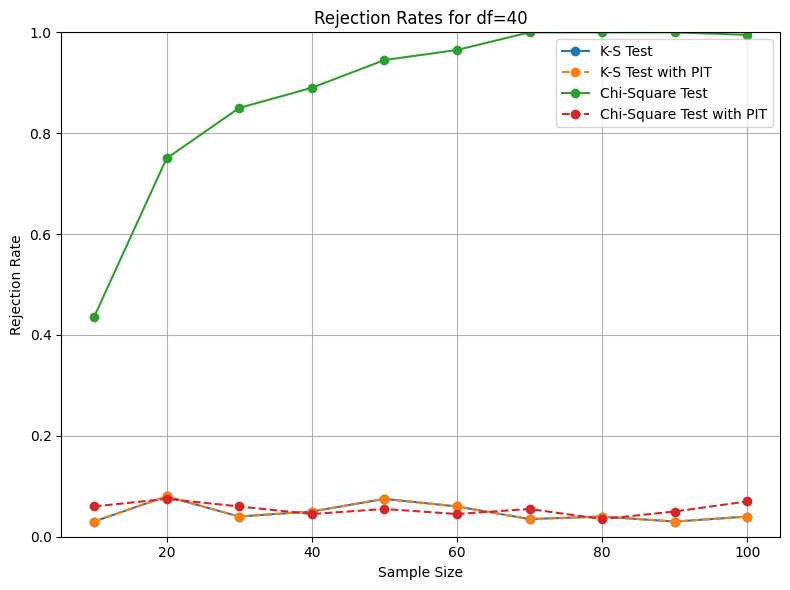

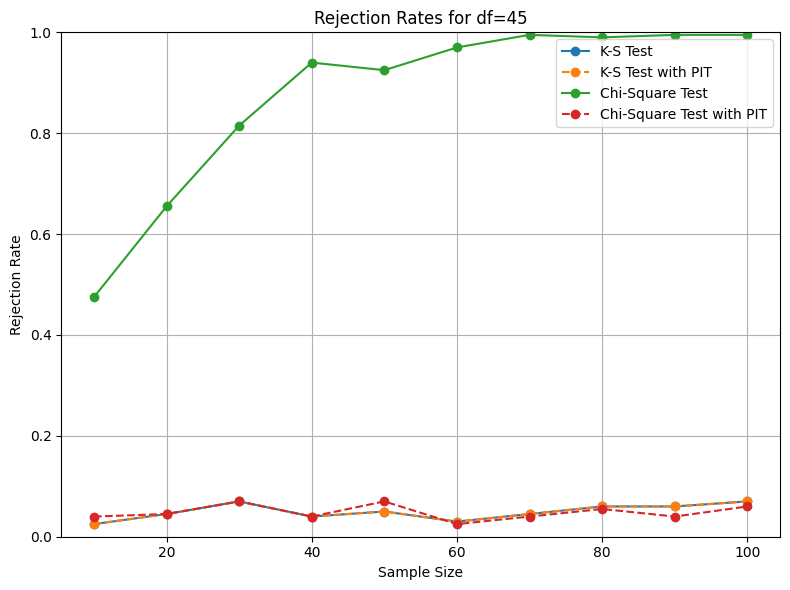

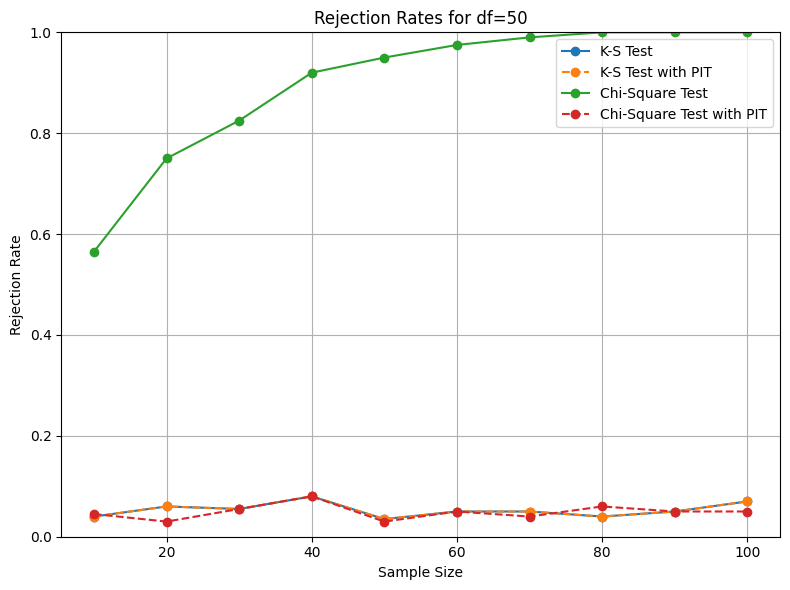

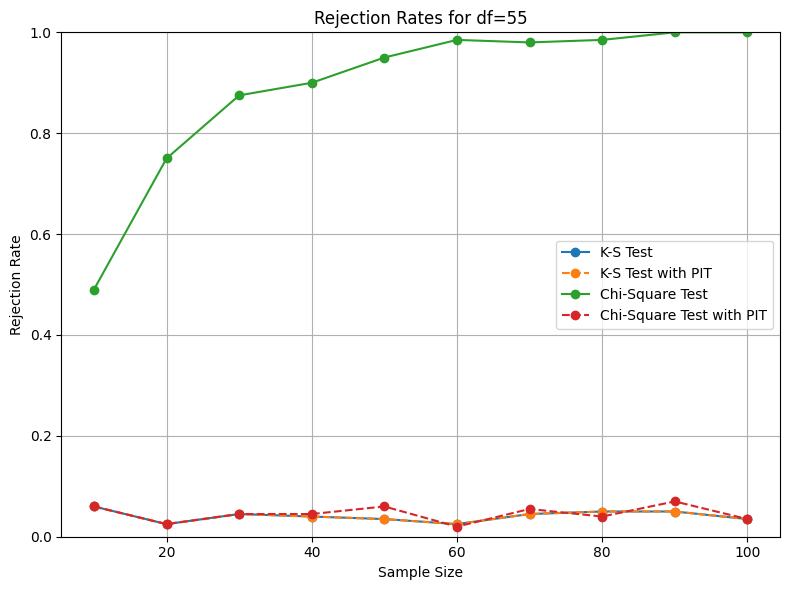

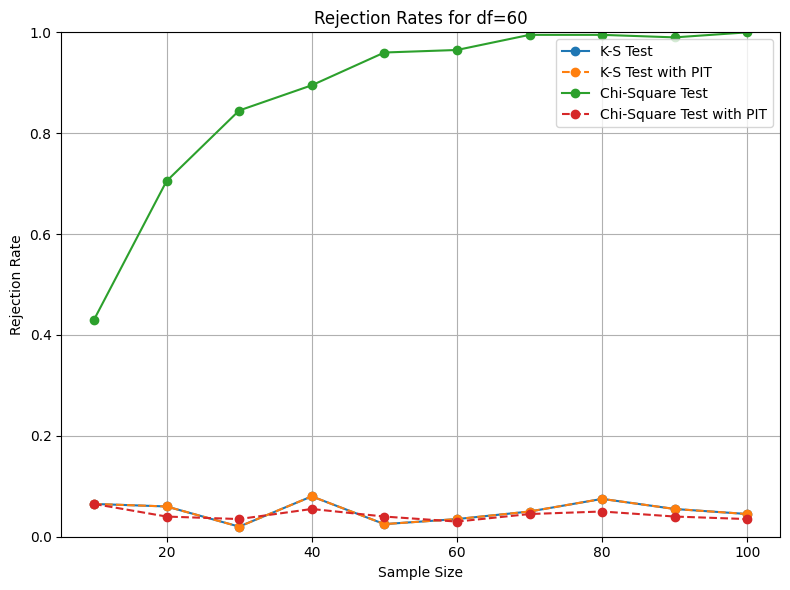

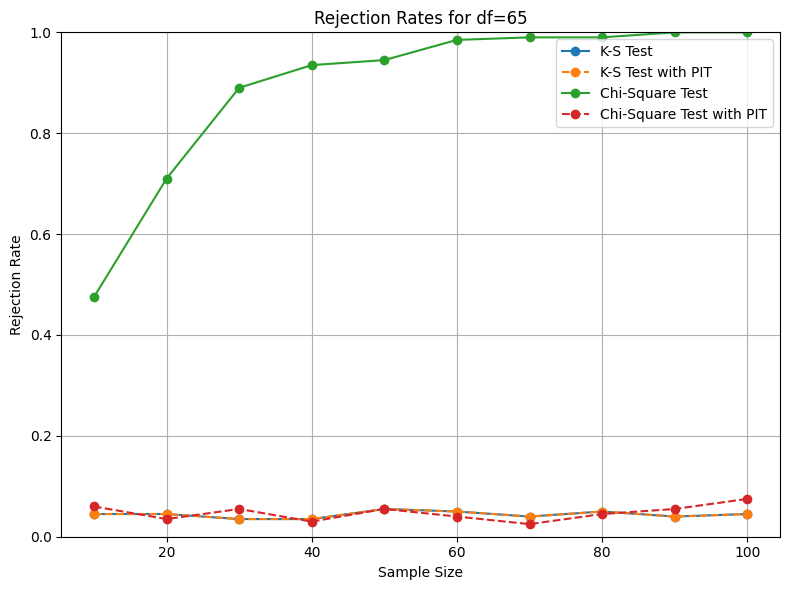

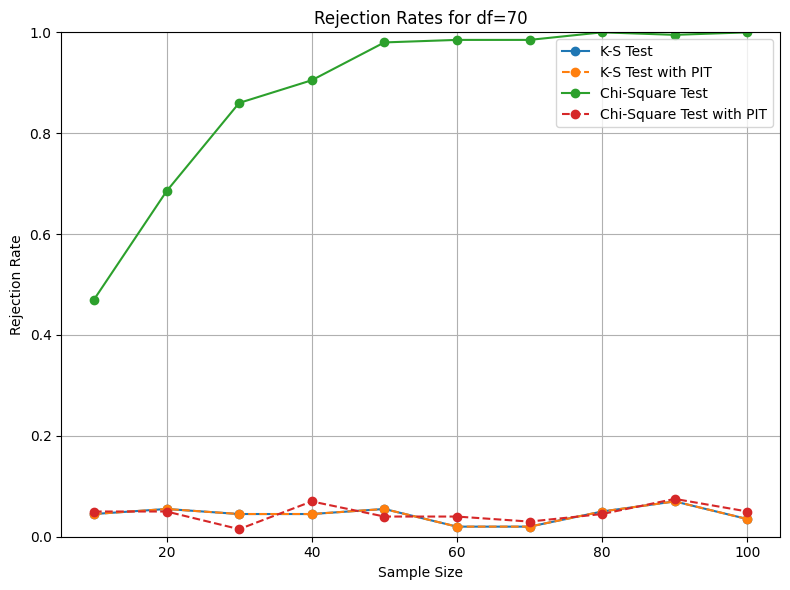

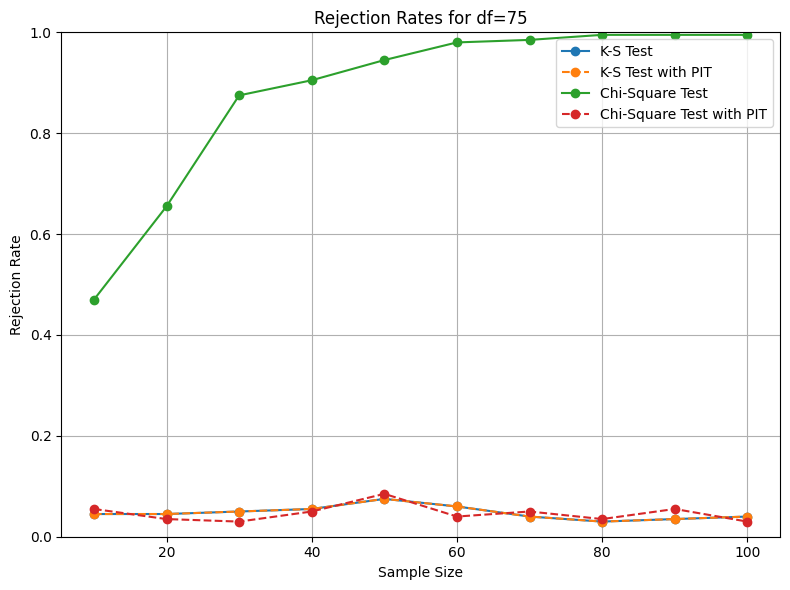

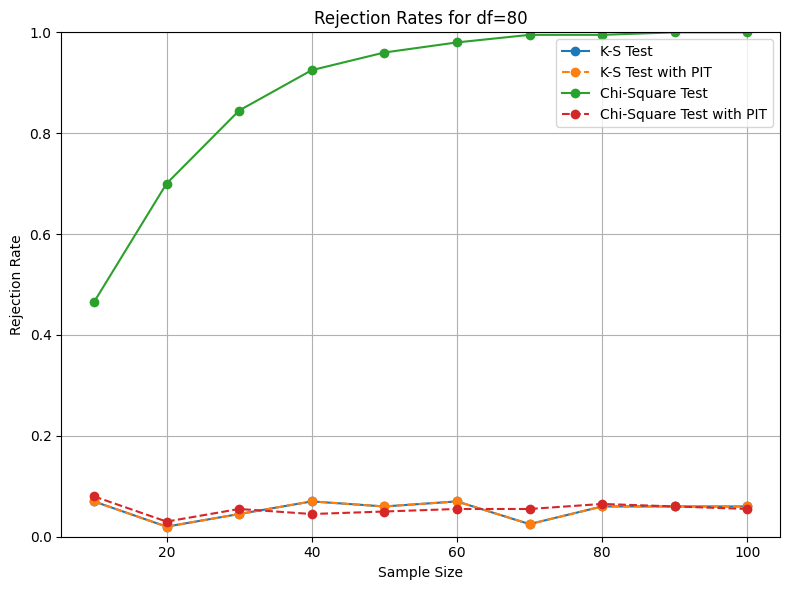

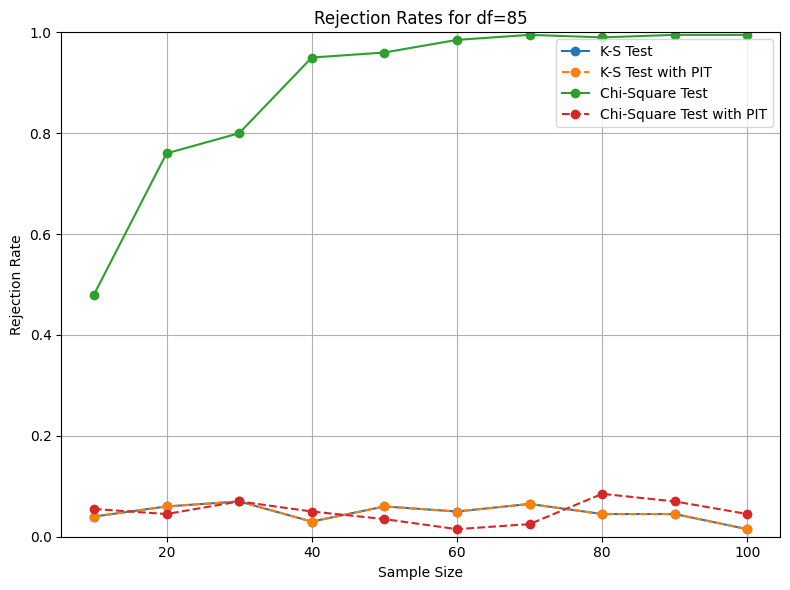

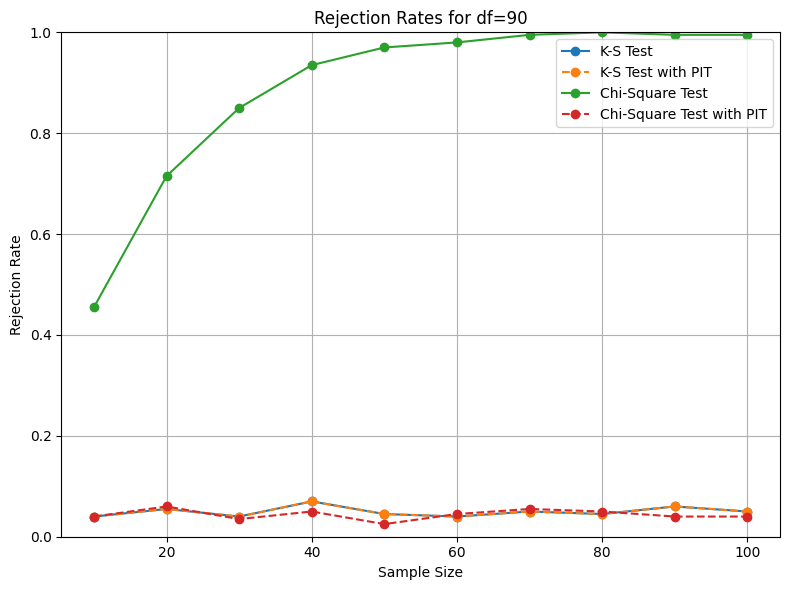

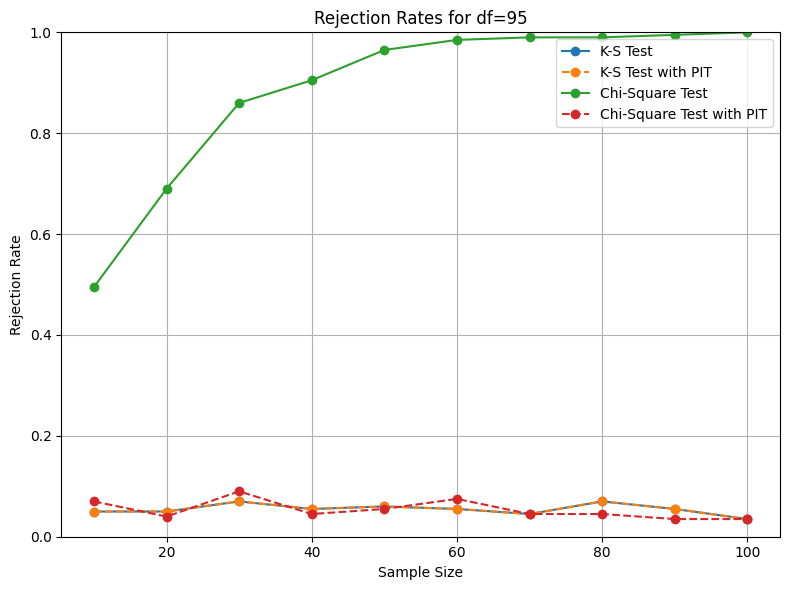

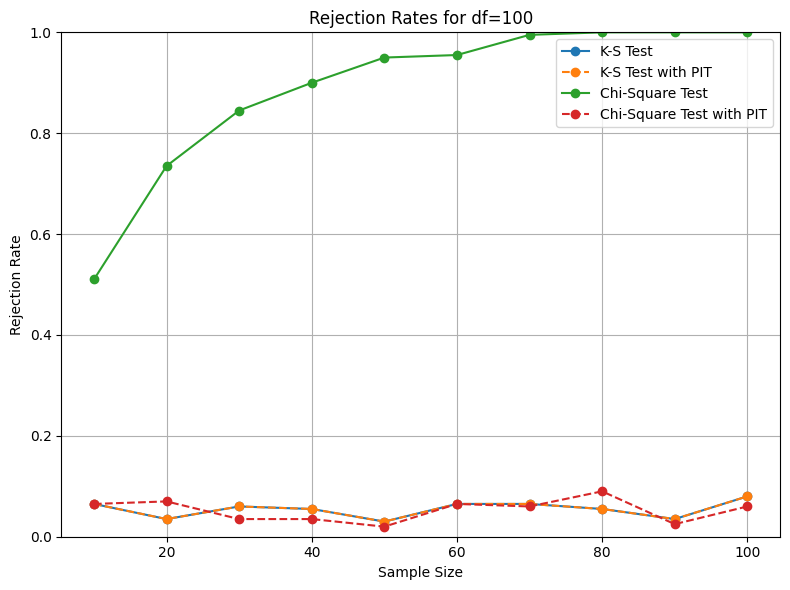

In [6]:
results_array = np.array(results).reshape((len(SampleSize), len(df), 4))

# Create individual plots for each degree of freedom
for idx, df_x in enumerate(df):
    ks_results = results_array[:, idx, 0]
    ks_pit_results = results_array[:, idx, 1]
    chi2_results = results_array[:, idx, 2]
    chi2_pit_results = results_array[:, idx, 3]

    plt.figure(figsize=(8, 6))
    plt.plot(SampleSize, ks_results, label='K-S Test', marker='o')
    plt.plot(SampleSize, ks_pit_results, label='K-S Test with PIT', marker='o', linestyle='dashed')
    plt.plot(SampleSize, chi2_results, label='Chi-Square Test', marker='o')
    plt.plot(SampleSize, chi2_pit_results, label='Chi-Square Test with PIT', marker='o', linestyle='dashed')

    plt.title(f'Rejection Rates for df={df_x}')
    plt.xlabel('Sample Size')
    plt.ylabel('Rejection Rate')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Test Kołmogorowa-Smirnowa (KS): Linia zielona na wykresie reprezentuje test KS. Widać, że wskaźnik odrzuceń rośnie wraz ze wzrostem rozmiaru próbki. Oznacza to, że im większa jest próbka, tym większa jest moc testu KS, co prowadzi do częstszego odrzucania prawdziwej hipotezy nullowej.
Test chi-kwadrat: Linia pomarańczowa na wykresie reprezentuje test chi-kwadrat. W przeciwieństwie do testu K-S, wskaźnik odrzuceń dla testu chi-kwadrat pozostaje stosunkowo stały niezależnie od rozmiaru próbki.
Testy z wykorzystaniem PIT (Probability Integral Transform): Linie z markerami reprezentują wyniki testów KS i chi-kwadrat z wykorzystaniem PIT. W obu przypadkach linie te śledzą swoje odpowiedniki bez PIT, ale na ogół mają niższy wskaźnik odrzuceń. Oznacza to, że wykorzystanie PIT może zmniejszyć częstość odrzucania prawdziwej hipotezy zeriwej.
Podsumowując, wykres ten pokazuje, jak różne metody testowania hipotez porównują się pod względem mocy testu w kontekście danych generowanych z rozkładu chi-kwadrat. Wydaje się, że test KS ma większą moc w porównaniu do testu chi-kwadrat, szczególnie dla większych rozmiarów próbek. Jednak wykorzystanie PIT wydaje się zmniejszać moc obu testów, co może być korzystne w sytuacjach, gdy chcemy unikać częstego odrzucania prawdziwej hipotezy zerowej. Wraz z większą ilością stopni swobody jedynie zwykły test chi-kwadrat jakoś się różni. Przy większej ilości DF częściej on odrzuca prawdziwą h0 nawet przy małych próbkach.